## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/customer_churn_dataset-testing-master.csv')

In [4]:
data.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [5]:
data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [6]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
def heatmap(data):
    correlation_matrix = data.corr()
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.show()

In [8]:
def feature_graph(data, column_name):
    plt.figure()
    plt.scatter(np.arange(len(data)), data, alpha=0.01)
    plt.title(f'Distribution of {column_name} in Coordinate Space')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()

In [9]:
def plot_feature_distribution(data, column):
    plt.figure()
    sns.kdeplot(data[column], fill=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show(block=False)

In [10]:
def plot_func(df, column, target):
    count_df = df.groupby([column, target]).size().unstack(fill_value=0)
    count_df = count_df.div(count_df.sum(axis=1), axis=0)
    count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))
    plt.xlabel(f'{column}')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Target by {column}')
    plt.legend(title='Target', loc='upper right')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for i in range(count_df.shape[0]):
        for j in range(count_df.shape[1]):
            plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='black')
    plt.show()

In [11]:
columns = ['Age','Tenure','Usage Frequency','Support Calls', 'Payment Delay','Total Spend', 'Last Interaction']

In [12]:
columns

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

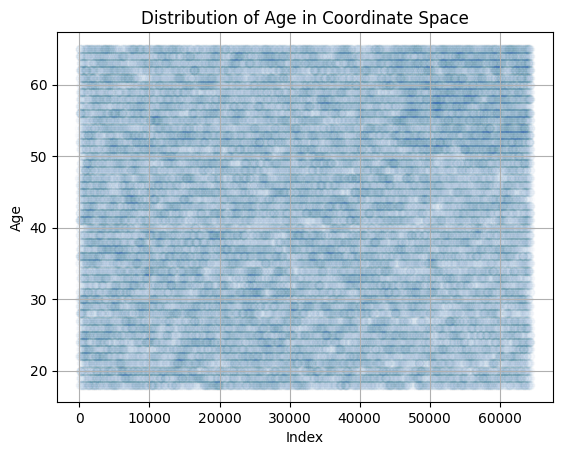

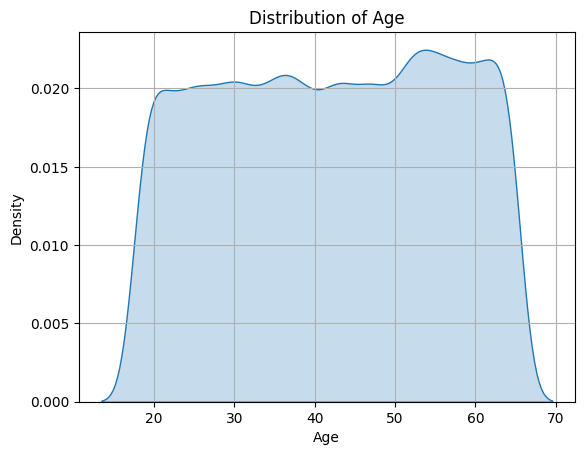

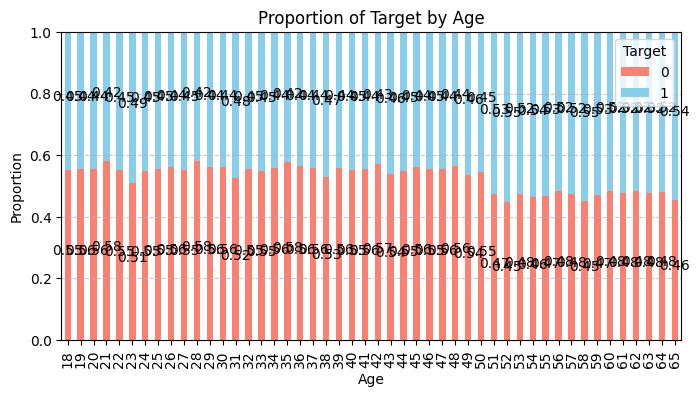

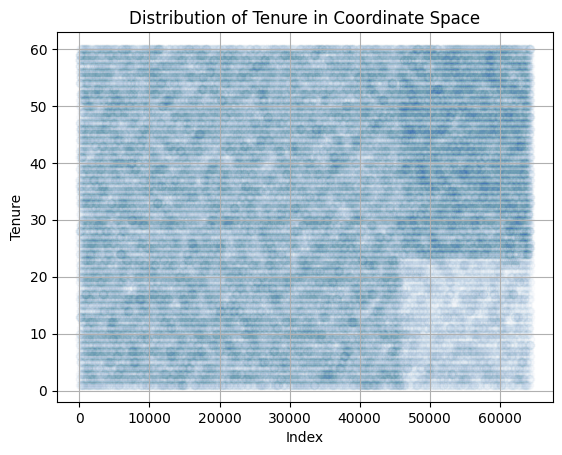

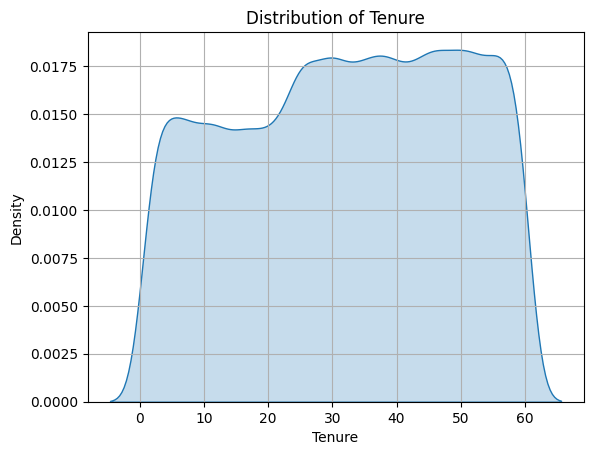

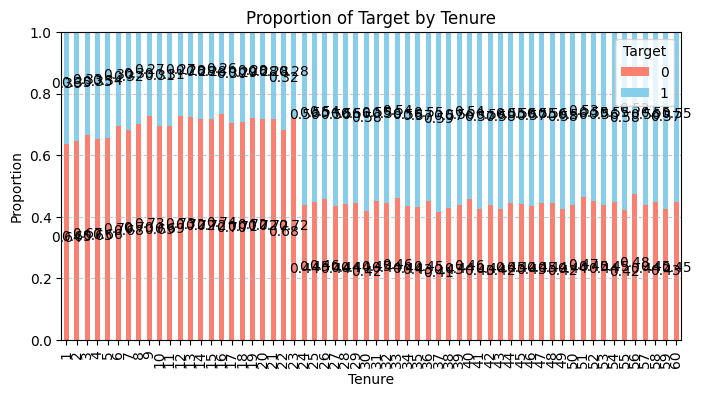

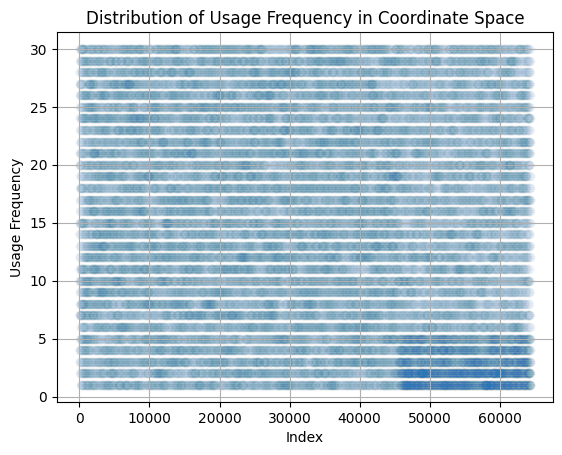

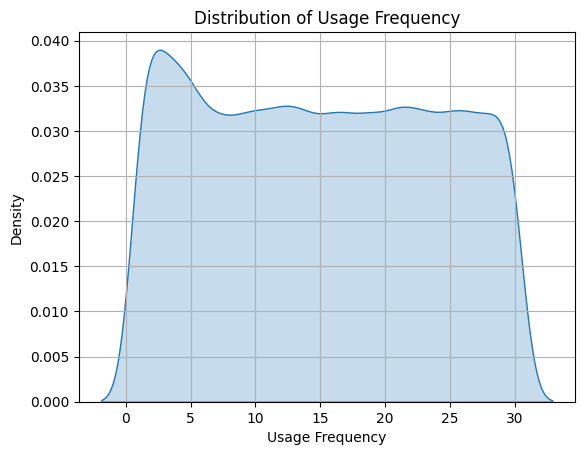

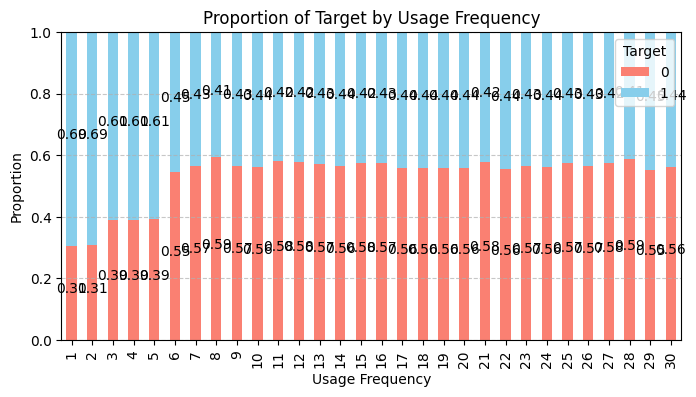

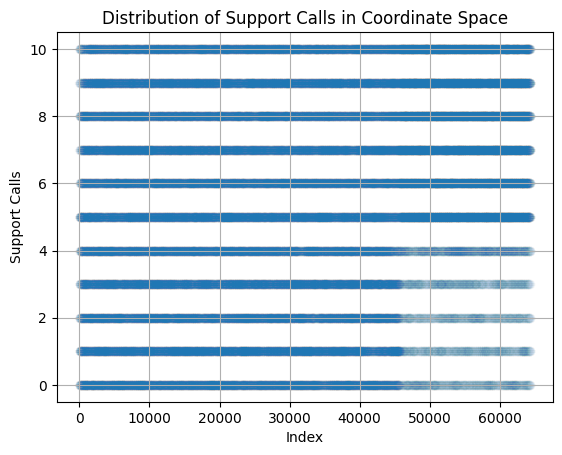

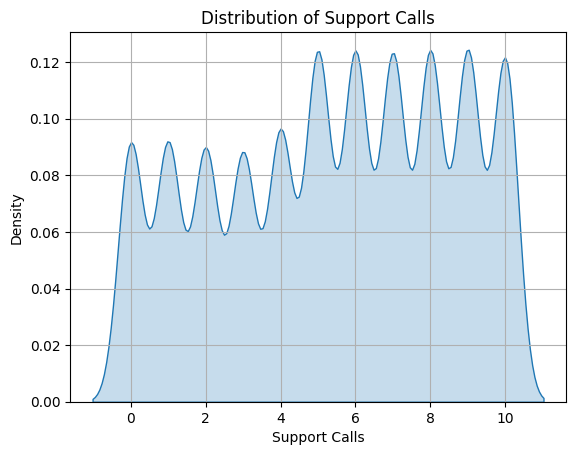

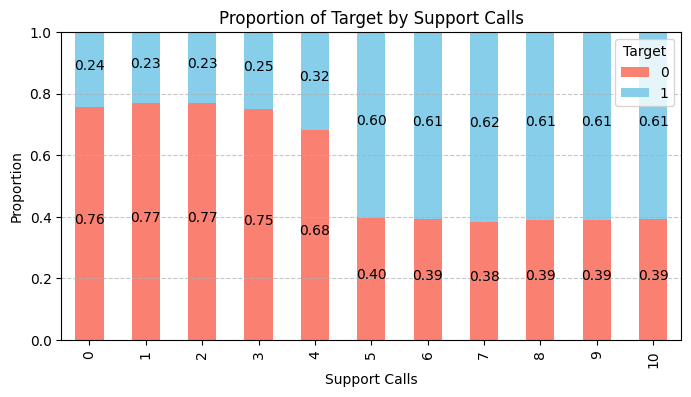

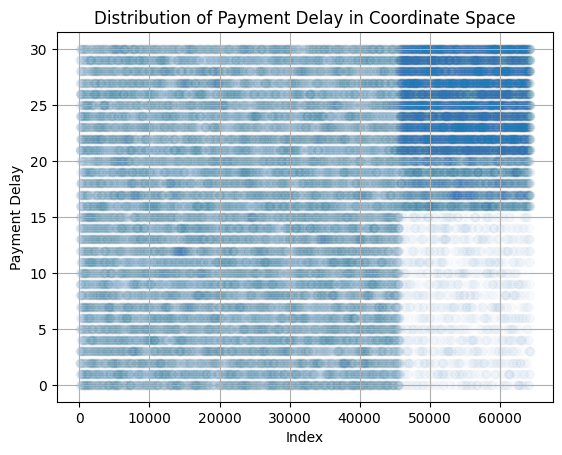

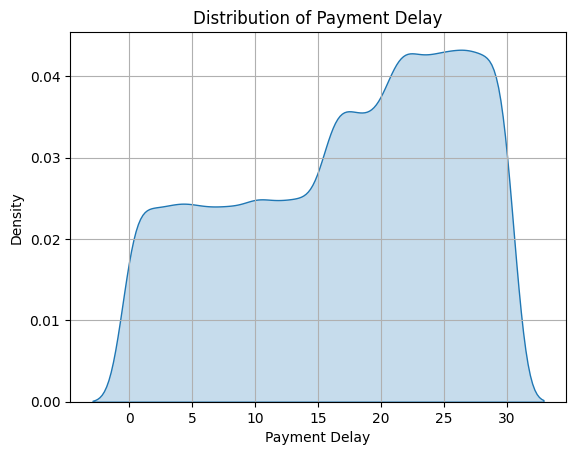

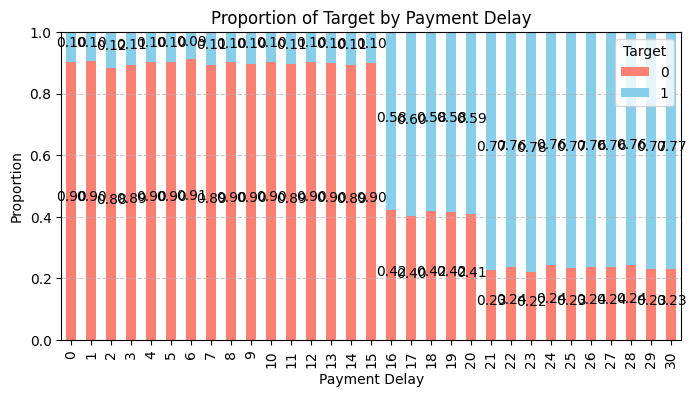

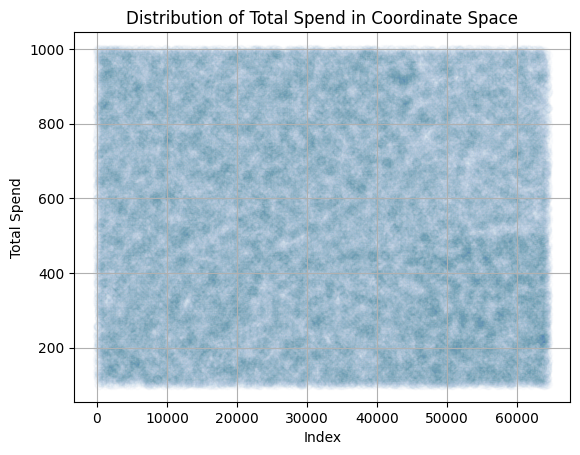

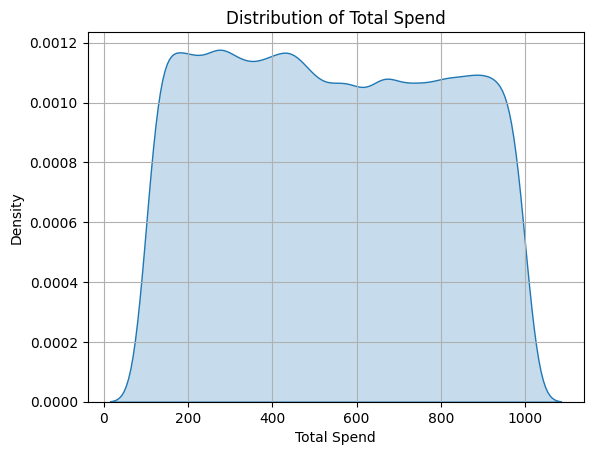

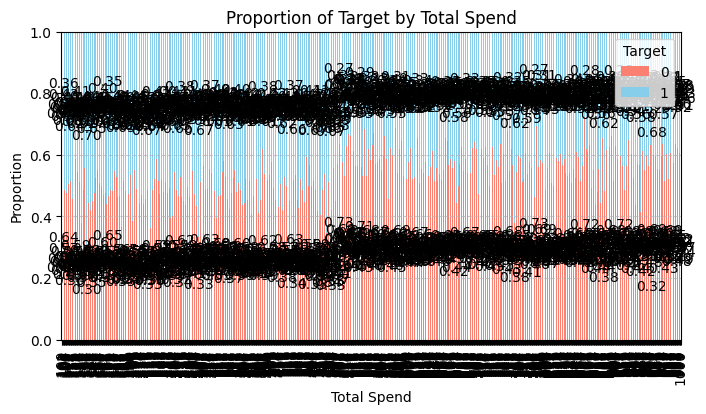

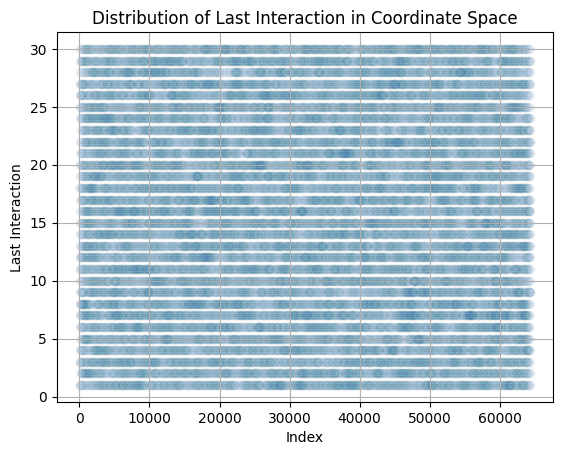

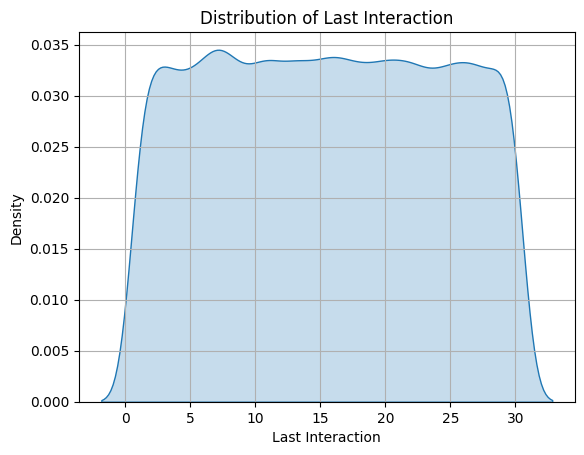

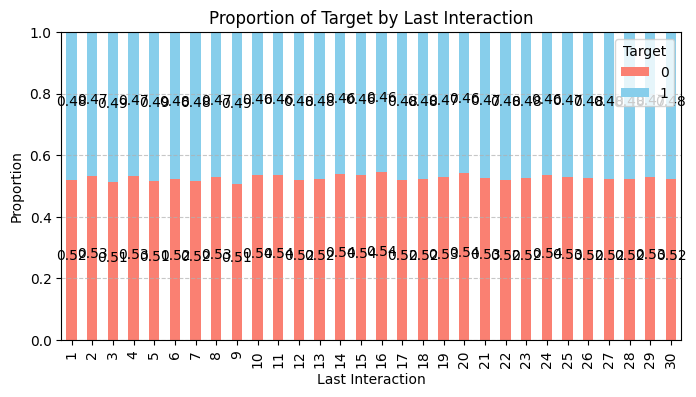

In [13]:
for col in columns:
    feature_graph(data[col], col)
    plot_feature_distribution(data, col)
    plot_func(data, col, 'Churn')

In [14]:
data = data.drop(columns=['Gender','Subscription Type','Contract Length','CustomerID'])

In [15]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

y = data['Churn']
x = data.drop(columns=['Churn'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(conf_matrix)

Accuracy: 0.8116392254323289
[[4146  937]
 [ 882 3692]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=110)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9206792999896448
Classification Report:
 [[4704  379]
 [ 387 4187]]
